In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the health insurance dataset and check the first five observations

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PGDSE/EDA/LAB/IN_CLASS/DAY 2/health_insurance.csv")
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df[df['bmi']>df['bmi'].mean()+3*df['bmi'].std()]

,age,gender,bmi,bp,children,region,smoker,medical_cost
248,50,M,51.07,164,2,southwest,non-smoker,9432.9253
363,52,F,51.52,163,1,southwest,non-smoker,8083.9198
809,28,F,52.38,156,1,northeast,non-smoker,2438.0552
822,40,M,51.60,178,2,southeast,smoker,46113.5110
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1279,22,F,57.13,150,0,northwest,non-smoker,1163.4627


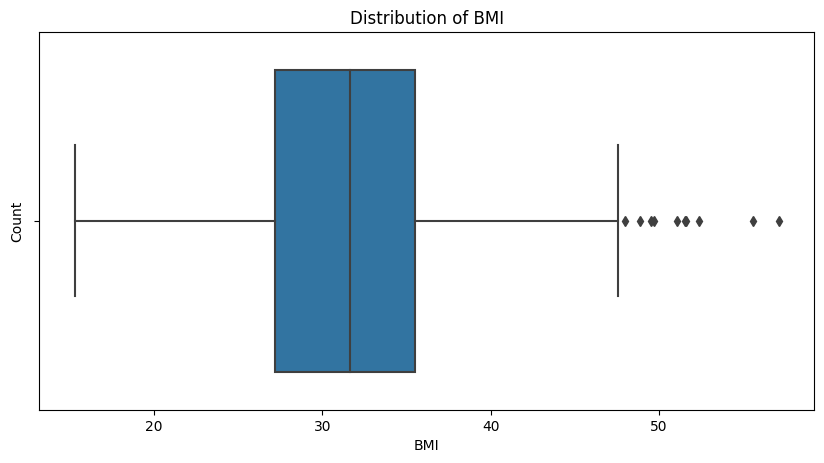

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x=df['bmi'])
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("Distribution of BMI")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

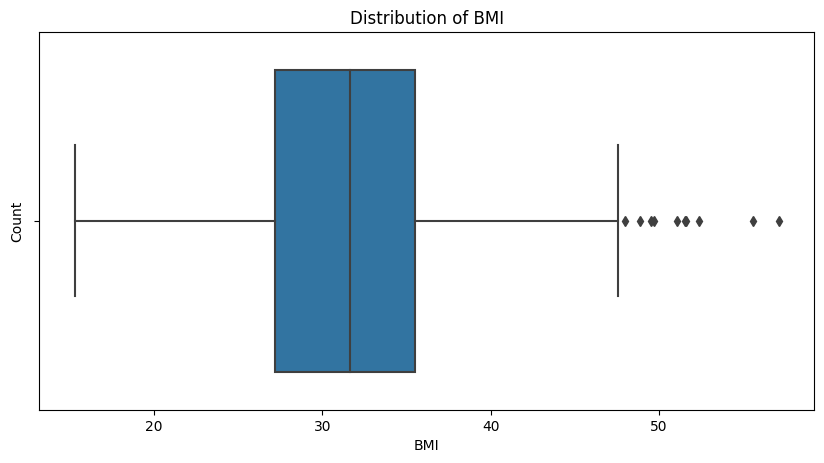

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x=df['bmi'])
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("Distribution of BMI")
plt.show()

In [ ]:
print(f"The Skewness of Age variable is {df['age'].skew():0.2f} and it is well within the range of calling that data is notmally distributed")

The Skewness of Age variable is 0.04 and it is well within the range of calling that data is notmally distributed


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

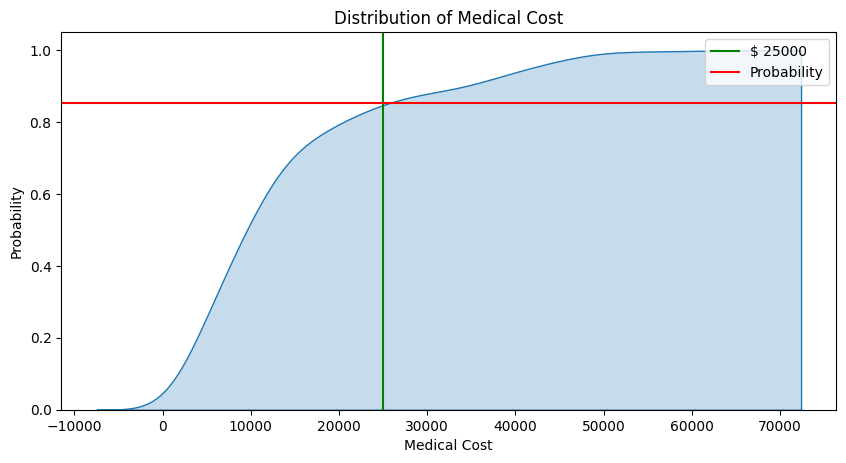

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df['medical_cost'],cumulative=True,shade=True)
plt.axvline(x=25000,label='$ 25000',color='green')
plt.axhline(y=df[df['medical_cost']<25000].shape[0]/len(df['medical_cost']),label="Probability",color='red')
plt.xlabel("Medical Cost")
plt.ylabel("Probability")
plt.title("Distribution of Medical Cost")
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The Skewness of the BMI is 0.2496769760401315


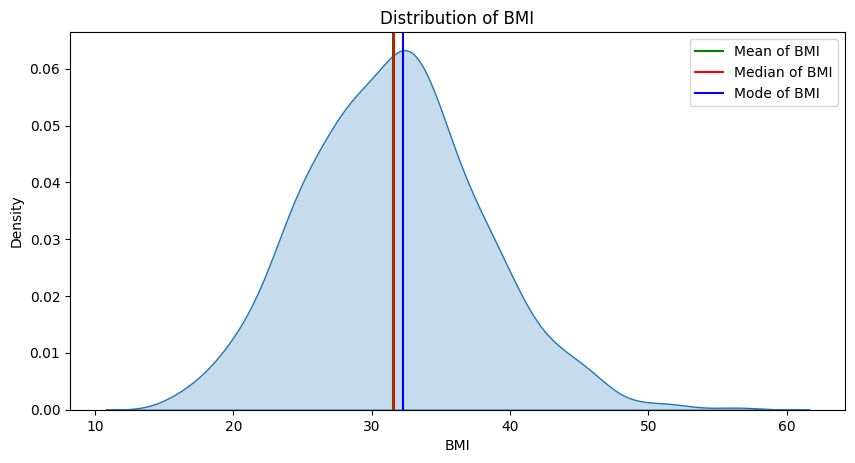

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df['bmi'],shade=True)
plt.axvline(x=df['bmi'].mean(),label='Mean of BMI',color='green')
plt.axvline(x=df['bmi'].median(),label="Median of BMI",color='red')
plt.axvline(df['bmi'].value_counts().index[0],label='Mode of BMI',color='blue')
plt.xlabel("BMI")
plt.ylabel("Density")
plt.title("Distribution of BMI")
print(f"The Skewness of the BMI is {df['bmi'].skew()}")
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The plot is highly skewed in nature in favour of right, it can be inferred that the cost for the treatment is very less an many people are receiving it


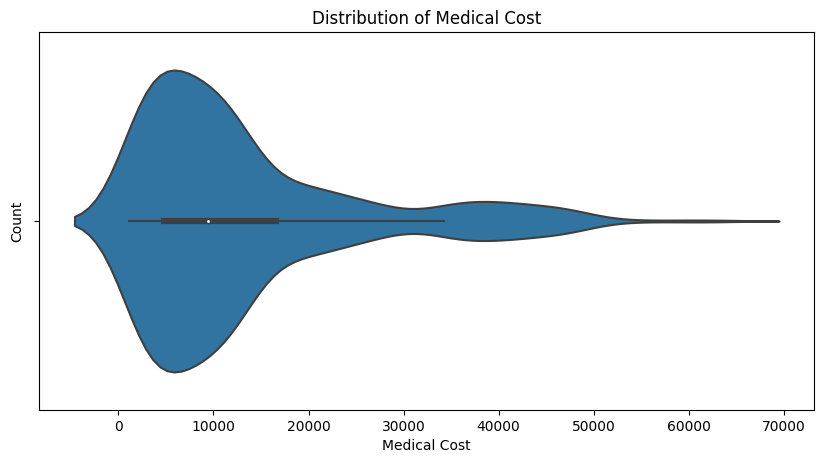

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.violinplot(x=df['medical_cost'])
plt.xlabel("Medical Cost")
plt.ylabel("Count")
plt.title("Distribution of Medical Cost")
print("The plot is highly skewed in nature in favour of right, it can be inferred that the cost for the treatment is very less an many people are receiving it")
plt.show()

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
print(f"There are total {df[(df['age']<30)&(df['medical_cost']>40000)].value_counts().count()} individuals and their names are displayed below\n\n{df[(df['age']<30)&(df['medical_cost']>40000)]}")

There are total 3 individuals and their names are displayed below

      age gender    bmi  bp   children     region  smoker  medical_cost
254    26      F  47.54  156         2  northeast  smoker    42112.2356
1009   25      F  55.58  152         1  northeast  smoker    44501.3982
1086   26      M  41.75  152         1  northeast  smoker    40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

There are 6 points that are potential outliers, who have BMI in the higher range than usual


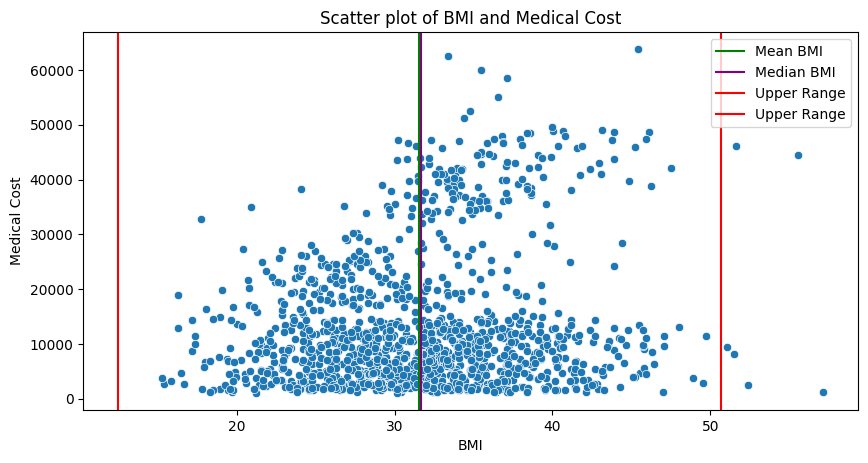

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data=df,x=df['bmi'],y=df['medical_cost'])
plt.xlabel("BMI")
plt.ylabel("Medical Cost")
plt.title("Scatter plot of BMI and Medical Cost")
plt.axvline(df['bmi'].mean(),label="Mean BMI",color='green')
plt.axvline(df['bmi'].median(),label="Median BMI",color='purple')
plt.axvline(df['bmi'].mean()+3*(df['bmi'].std()),label='Upper Range',color='red')
plt.axvline(df['bmi'].mean()-3*(df['bmi'].std()),label='Upper Range',color='red')
print(f"There are 6 points that are potential outliers, who have BMI in the higher range than usual")
plt.legend()
plt.show()

There are many outliers, that means there are patients who are paying more for treatment is less and those who are paying less are more.


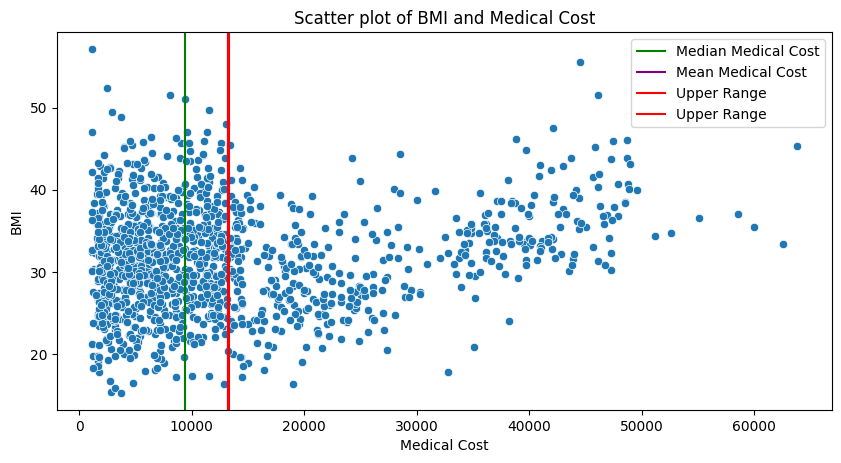

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data=df,y=df['bmi'],x=df['medical_cost'])
plt.ylabel("BMI")
plt.xlabel("Medical Cost")
plt.title("Scatter plot of BMI and Medical Cost")
plt.axvline(df['medical_cost'].median(),label="Median Medical Cost",color='green')
plt.axvline(df['medical_cost'].mean(),label="Mean Medical Cost",color='purple')
plt.axvline(df['medical_cost'].mean()+3*(df['bmi'].std()),label='Upper Range',color='red')
plt.axvline(df['medical_cost'].mean()-3*(df['bmi'].std()),label='Upper Range',color='red')
print(f"There are many outliers, that means there are patients who are paying more for treatment is less and those who are paying less are more.")
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
pd.pivot_table(index='gender',values='bmi',aggfunc='var',data=df)

,bmi
gender,
F,41.003509
M,39.732451


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
pd.crosstab(df['gender'],df['region'])

region,northeast,northwest,southeast,southwest
gender,,,,
F,174,149,178,156
M,141,166,178,158


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping

<Figure size 1000x800 with 0 Axes>

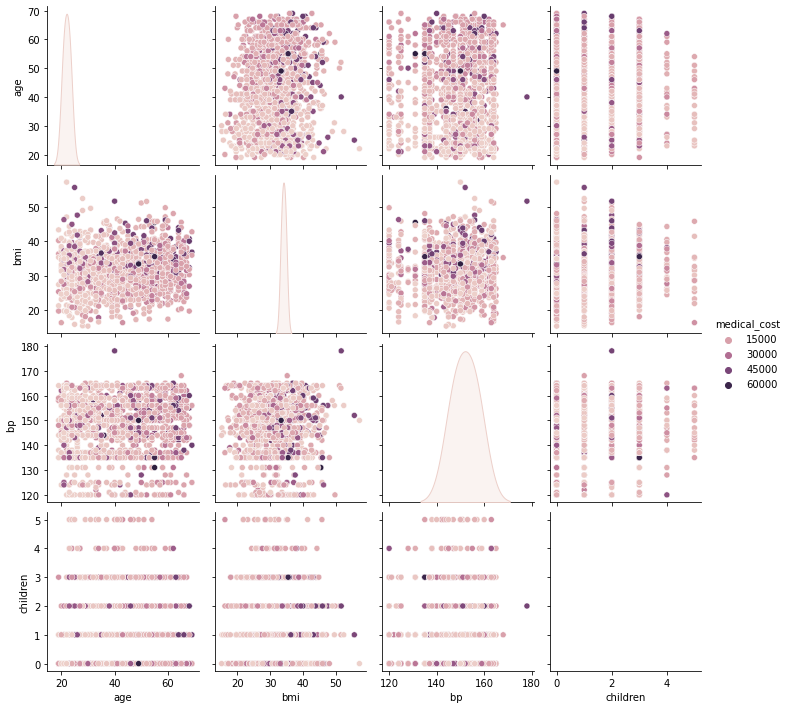

In [ ]:
# import your code here
df1=df.select_dtypes(exclude='object')
plt.figure(figsize=(10,8),dpi=100)
sns.pairplot(df1,hue='medical_cost')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
pd.pivot_table(data=df,index='smoker',values='medical_cost',aggfunc="mean")

,medical_cost
smoker,
non-smoker,8445.751624
smoker,31980.476103


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

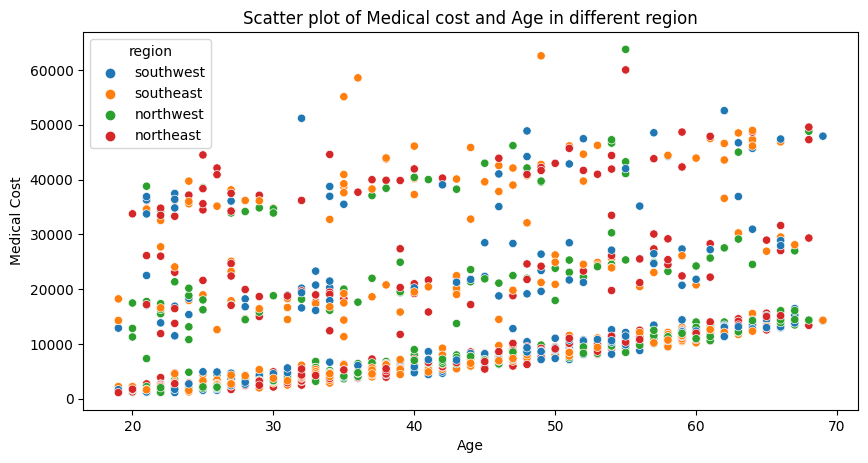

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x='age',data=df,y='medical_cost',hue='region')
plt.xlabel("Age")
plt.ylabel("Medical Cost")
plt.title("Scatter plot of Medical cost and Age in different region")
plt.show()

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df2=df.select_dtypes(include='object')

In [ ]:
df2=pd.get_dummies(df2,columns=['region'],drop_first=True)
df2

,gender,smoker,region_northwest,region_southeast,region_southwest
0,M,smoker,0,0,1
1,F,non-smoker,0,1,0
2,F,non-smoker,0,1,0
3,F,non-smoker,1,0,0
4,F,non-smoker,1,0,0
...,...,...,...,...,...
1295,F,non-smoker,0,0,1
1296,M,non-smoker,0,0,0
1297,M,non-smoker,0,1,0
1298,M,non-smoker,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df2['smoker_label']=le.fit_transform(df2['smoker'])

print(f"Encoded Dataframe :\n{df2.head()}")

print(f'''\n\nInference : The above dataframe follows mentioned encoding for each region :--
1. smoker--->1
2. non-smoker--->0''')

Encoded Dataframe :
  gender      smoker  ...  region_southwest  smoker_label
0      M      smoker  ...                 1             1
1      F  non-smoker  ...                 0             0
2      F  non-smoker  ...                 0             0
3      F  non-smoker  ...                 0             0
4      F  non-smoker  ...                 0             0

[5 rows x 6 columns]


Inference : The above dataframe follows mentioned encoding for each region :--
1. smoker--->1
2. non-smoker--->0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
var=df2['gender'].value_counts()
df2['gen_frq_encoding']=df2['gender'].map(var)
print(f"Encoded Dataframe :\n\n{df2.head()}")

Encoded Dataframe :

  gender      smoker  ...  smoker_label  gen_frq_encoding
0      M      smoker  ...             1               643
1      F  non-smoker  ...             0               657
2      F  non-smoker  ...             0               657
3      F  non-smoker  ...             0               657
4      F  non-smoker  ...             0               657

[5 rows x 7 columns]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df2['smoker_label']=le.fit_transform(df2['smoker'])

print(f"Encoded Dataframe :\n{df2.head()}")

print(f'''\n\nInference : The above dataframe follows mentioned encoding for each region :--
1. smoker--->1
2. non-smoker--->0''')

Encoded Dataframe :
  gender      smoker  ...  smoker_label  gen_frq_encoding
0      M      smoker  ...             1               643
1      F  non-smoker  ...             0               657
2      F  non-smoker  ...             0               657
3      F  non-smoker  ...             0               657
4      F  non-smoker  ...             0               657

[5 rows x 7 columns]


Inference : The above dataframe follows mentioned encoding for each region :--
1. smoker--->1
2. non-smoker--->0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
df1['Scaled_bmi']=sc.fit_transform(df1[['bmi']])
df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,bmi,bp,children,medical_cost,Scaled_bmi
0,23,31.900,157,0,16884.92400,0.050142
1,20,36.770,160,1,1725.55230,0.816583
2,33,35.000,145,3,4449.46200,0.538020
3,37,23.705,153,0,21984.47061,-1.239588
4,36,27.880,156,0,3866.85520,-0.582526
...,...,...,...,...,...,...
1295,54,30.970,143,3,10600.54830,-0.096222
1296,22,34.920,156,0,2205.98080,0.525430
1297,21,34.850,145,0,1629.83350,0.514413
1298,22,24.800,150,0,2007.94500,-1.067257


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [ ]:
df1['Scaled_age']=mm.fit_transform(df1[['age']])
df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,bmi,bp,children,medical_cost,Scaled_bmi,Scaled_age
0,23,31.900,157,0,16884.92400,0.050142,0.08
1,20,36.770,160,1,1725.55230,0.816583,0.02
2,33,35.000,145,3,4449.46200,0.538020,0.28
3,37,23.705,153,0,21984.47061,-1.239588,0.36
4,36,27.880,156,0,3866.85520,-0.582526,0.34
...,...,...,...,...,...,...,...
1295,54,30.970,143,3,10600.54830,-0.096222,0.70
1296,22,34.920,156,0,2205.98080,0.525430,0.06
1297,21,34.850,145,0,1629.83350,0.514413,0.04
1298,22,24.800,150,0,2007.94500,-1.067257,0.06


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1['Transformed_Medical_Cost']=np.log(df['medical_cost'])
df1

,age,bmi,bp,children,medical_cost,Scaled_bmi,Scaled_age,Transformed_Medical_Cost
0,23,31.900,157,0,16884.92400,0.050142,0.08,9.734176
1,20,36.770,160,1,1725.55230,0.816583,0.02,7.453302
2,33,35.000,145,3,4449.46200,0.538020,0.28,8.400538
3,37,23.705,153,0,21984.47061,-1.239588,0.36,9.998092
4,36,27.880,156,0,3866.85520,-0.582526,0.34,8.260197
...,...,...,...,...,...,...,...,...
1295,54,30.970,143,3,10600.54830,-0.096222,0.70,9.268661
1296,22,34.920,156,0,2205.98080,0.525430,0.06,7.698927
1297,21,34.850,145,0,1629.83350,0.514413,0.04,7.396233
1298,22,24.800,150,0,2007.94500,-1.067257,0.06,7.604867


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

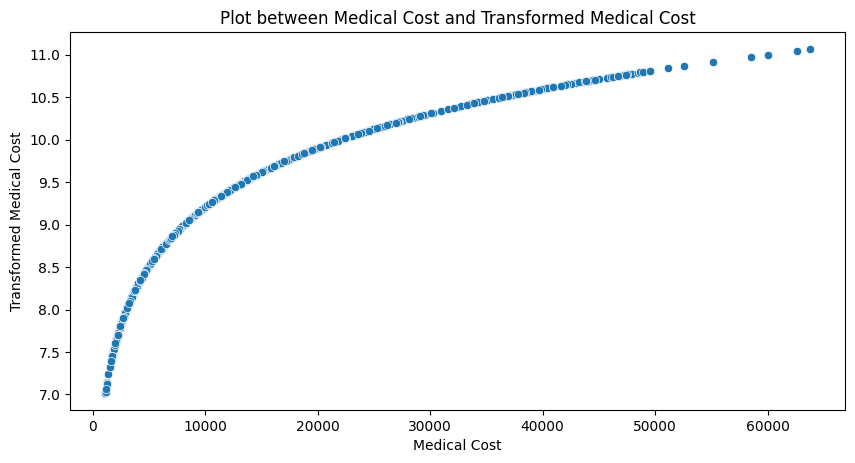

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data=df1,x='medical_cost',y='Transformed_Medical_Cost')
plt.title("Plot between Medical Cost and Transformed Medical Cost")
plt.xlabel("Medical Cost")
plt.ylabel("Transformed Medical Cost")
plt.show()